In [46]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [27]:
housing = pd.read_csv("Housing.csv")

In [28]:
housing.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [29]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

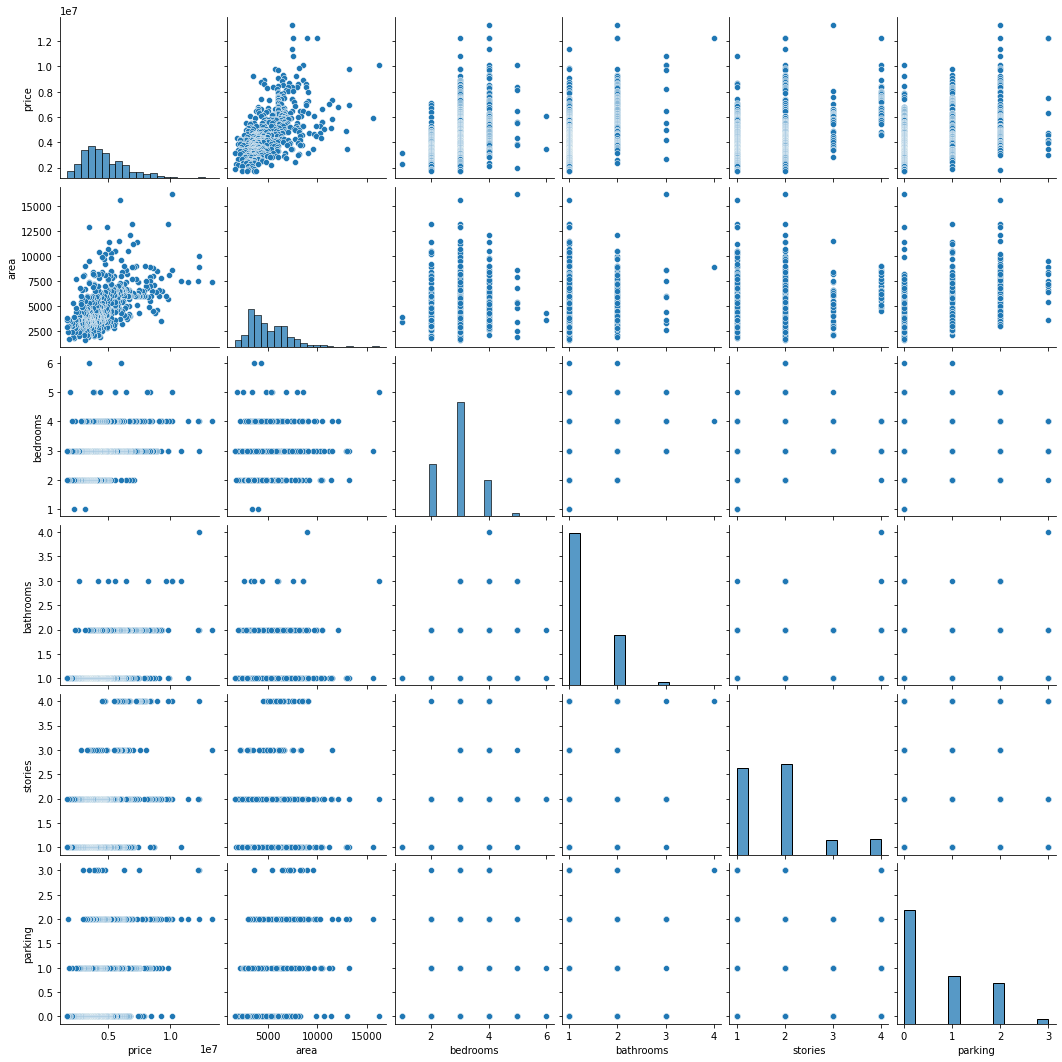

In [32]:
sns.pairplot(housing)

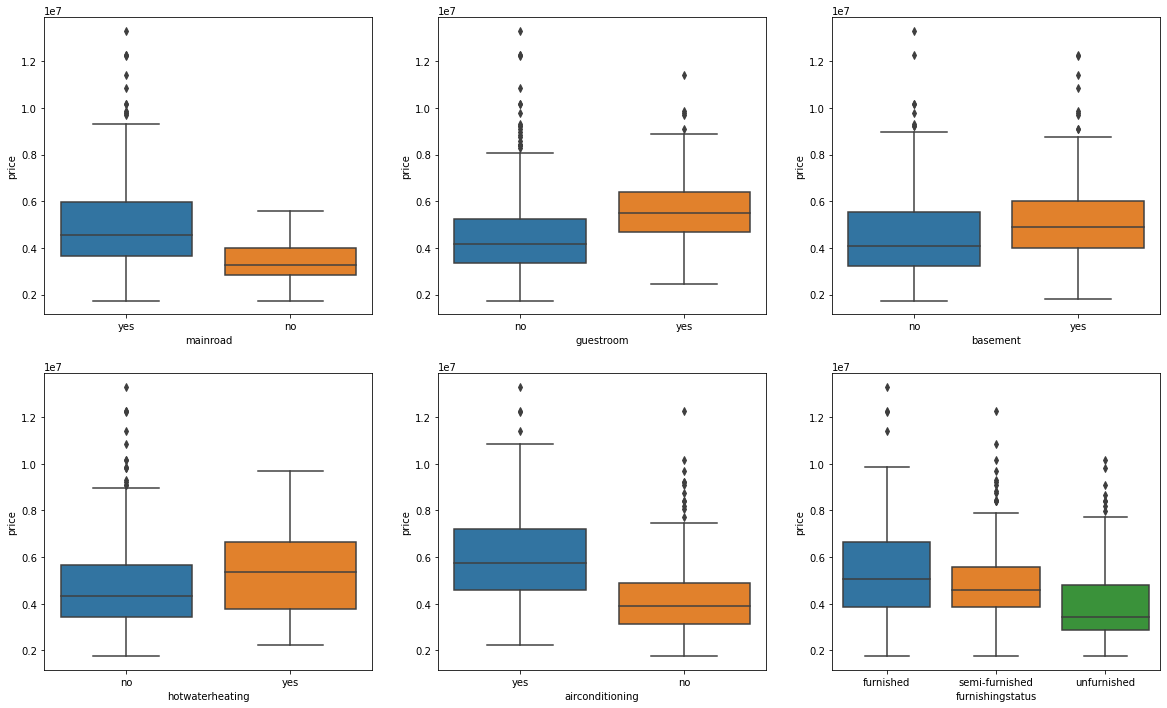

In [33]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

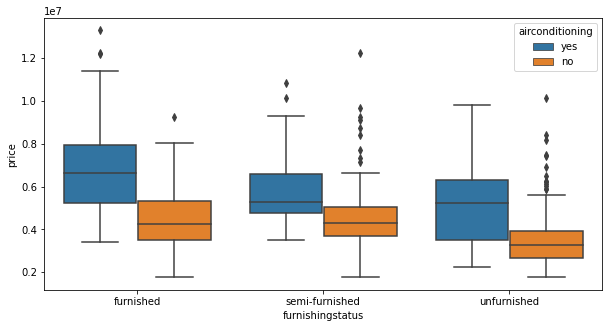

In [34]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()

In [35]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

for i in varlist:
    housing[i] = housing[i].apply(lambda x: 1 if(x=='yes') else 0)

In [36]:
housing.furnishingstatus.value_counts()

semi-furnished    227
unfurnished       178
furnished         140
Name: furnishingstatus, dtype: int64

In [37]:
dummies = pd.get_dummies(housing.furnishingstatus)

In [38]:
dummies = dummies.drop(['unfurnished'], axis=1)

In [39]:
housing = pd.concat([housing, dummies], axis=1)

In [40]:
housing.drop(['furnishingstatus'], axis=1, inplace=True)

In [44]:
housing.shape

(545, 14)

In [55]:
train, test = train_test_split(housing, train_size=0.7, test_size=0.3, random_state=100)
train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
359,3710000,3600,3,1,1,1,0,0,0,0,1,0,0,0
19,8855000,6420,3,2,2,1,0,0,0,1,1,1,0,1
159,5460000,3150,3,2,1,1,1,1,0,1,0,0,1,0
35,8080940,7000,3,2,4,1,0,0,0,1,2,0,1,0
28,8400000,7950,5,2,2,1,0,1,1,0,2,0,0,0


In [56]:
scaler = MinMaxScaler()
train[:] = scaler.fit_transform(train[:])

In [57]:
train

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnished,semi-furnished
359,0.169697,0.155227,0.4,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.0
19,0.615152,0.403379,0.4,0.5,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,0.0,1.0
159,0.321212,0.115628,0.4,0.5,0.000000,1.0,1.0,1.0,0.0,1.0,0.000000,0.0,1.0,0.0
35,0.548133,0.454417,0.4,0.5,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,1.0,0.0
28,0.575758,0.538015,0.8,0.5,0.333333,1.0,0.0,1.0,1.0,0.0,0.666667,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.048485,0.118268,0.2,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
53,0.484848,0.291623,0.4,0.5,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.0,1.0
350,0.175758,0.139388,0.2,0.0,0.333333,1.0,0.0,0.0,1.0,0.0,0.333333,0.0,0.0,1.0
79,0.424242,0.366420,0.4,0.5,0.666667,1.0,1.0,0.0,0.0,1.0,0.000000,0.0,1.0,0.0


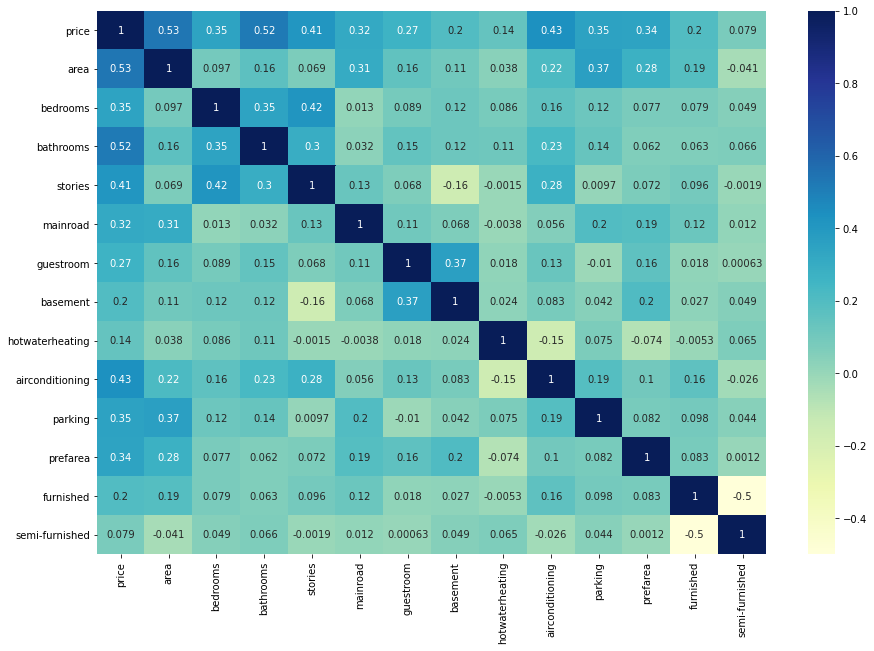

In [74]:
plt.figure(figsize=(15,10))
sns.heatmap(train.corr(), cmap='YlGnBu', annot=True)
plt.show()